In [1]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_column', 200)

In [2]:
gdf = gpd.read_file("clean_data/master.shp")

## Purpose

Our purpose is to understand the effects of the `concentration grant` on academic performance. 

## Structure
The general structure of the dataset is as follows:

- county<br>
    58 in the state - top level deliniator
    
    
- county    
    - school district<br>
    Within each county, a number of school districts. We have demographic profiles of each district that we can use in the matching process, if applicable
    
    
- county    
    - school district    
        - student group<br>
        Further, the grade data breaks down into 17 student groups per district. Using this we can query academic performance by a specific group.
        
        
- county    
    - school district    
        - student group
            - math grades
            - english grades<br>
            Finally, the specific math and english grades lie at the bottom of the data structure. 

In [3]:
gdf

,index,OBJECTID,Year,FedID,CDCode,CDSCode,CountyName,DistrictNa,DistrictTy,GradeLow,GradeHigh,GradeLowCe,GradeHighC,AssistStat,CongressUS,SenateCA,AssemblyCA,LocaleDist,UpdateNote,EnrollTota,EnrollChar,EnrollNonC,AAcount,AApct,AIcount,AIpct,AScount,ASpct,FIcount,FIpct,HIcount,HIpct,MRcount,MRpct,PIcount,PIpct,WHcount,WHpct,NRcount,NRpct,ELcount,ELpct,FOScount,FOSpct,HOMcount,HOMpct,MIGcount,MIGpct,SWDcount,SWDpct,SEDcount,SEDpct,UPcount,UPpct,ELATested,ELAStdMetP,MathTested,MathStdMet,CCPrepCoho,CCPrepPct,AbsentElig,AbsentPct,GradCohort,GradPct,UCCSUReqMe,DropOutPct,EnrollCumu,SuspPct,SHAPE_Leng,SHAPE_Area,district_1,unduplicat,base_grant,supplement,concentrat,total_gran,cds,District C,e_chan AA,e_chan AI,e_chan ALL,e_chan AS,e_chan EL,e_chan ELO,e_chan EO,e_chan FI,e_chan FOS,e_chan HI,e_chan HOM,e_chan MR,e_chan PI,e_chan RFP,e_chan SED,e_chan SWD,e_chan WH,e_curr AA,e_curr AI,e_curr ALL,e_curr AS,e_curr EL,e_curr ELO,e_curr EO,e_curr FI,e_curr FOS,e_curr HI,e_curr HOM,e_curr MR,e_curr PI,e_curr RFP,e_curr SED,e_curr SWD,e_curr WH,e_prio AA,e_prio AI,e_prio ALL,e_prio AS,e_prio EL,e_prio ELO,e_prio EO,e_prio FI,e_prio FOS,e_prio HI,e_prio HOM,e_prio MR,e_prio PI,e_prio RFP,e_prio SED,e_prio SWD,e_prio WH,m_chan AA,m_chan AI,m_chan ALL,m_chan AS,m_chan EL,m_chan ELO,m_chan EO,m_chan FI,m_chan FOS,m_chan HI,m_chan HOM,m_chan MR,m_chan PI,m_chan RFP,m_chan SED,m_chan SWD,m_chan WH,m_curr AA,m_curr AI,m_curr ALL,m_curr AS,m_curr EL,m_curr ELO,m_curr EO,m_curr FI,m_curr FOS,m_curr HI,m_curr HOM,m_curr MR,m_curr PI,m_curr RFP,m_curr SED,m_curr SWD,m_curr WH,m_prio AA,m_prio AI,m_prio ALL,m_prio AS,m_prio EL,m_prio ELO,m_prio EO,m_prio FI,m_prio FOS,m_prio HI,m_prio HOM,m_prio MR,m_prio PI,m_prio RFP,m_prio SED,m_prio SWD,m_prio WH,geometry
0,NaN,1,2018-19,0601770,0161119,1611190000000,Alameda,Alameda Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,18,"21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,11260,1877,9383,825,7.300000,28,0.2,2854,25.299999,683,6.1,1960,17.400000,1310,11.6,67,0.6,3244,28.799999,289,2.6,1601,14.2,26,0.2,67,0.6,0,0.0,1289,11.4,3523,31.299999,3144,33.500000,4567.0,69.400002,4587.0,59.700001,773.0,56.799999,11453.0,9.4,882.0,88.900002,58.900002,5.2,11600.0,2.6,57196.403944,4.733304e+07,Alameda Unified,0.3486,"75,938,983","5,294,466",-,"82,158,116",1611190000000,11190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-13606221.352 4540862.002, -13..."
1,NaN,2,2018-19,0601860,0161127,1611270000000,Alameda,Albany City Unified,Unified,KG,12,KG,12,General Assistance,13,09,15,"21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,3682,0,3682,111,3.000000,4,0.1,1063,28.900000,47,1.3,592,16.100000,510,13.9,6,0.2,1163,31.600000,186,5.1,583,15.8,2,0.1,12,0.3,0,0.0,312,8.5,777,21.100000,1118,30.400000,1773.0,79.199997,1795.0,72.000000,302.0,62.599998,3763.0,6.4,301.0,94.699997,63.900002,1.7,3830.0,1.9,12870.772156,7.161276e+06,Albany City Unified,0.2833,"29,644,972","1,679,684",-,"31,352,540",1611270000000,11270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-13612889.056 4565138.930, -13612894..."
2,NaN,3,2018-19,0604740,0161143,1611430000000,Alameda,Berkeley Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,15,"12 - City, Midsi

In [4]:
gdf.columns

Index(['index', 'OBJECTID', 'Year', 'FedID', 'CDCode', 'CDSCode', 'CountyName',
       'DistrictNa', 'DistrictTy', 'GradeLow',
       ...
       'm_prio FOS', 'm_prio HI', 'm_prio HOM', 'm_prio MR', 'm_prio PI',
       'm_prio RFP', 'm_prio SED', 'm_prio SWD', 'm_prio WH', 'geometry'],
      dtype='object', length=181)

This shows that there are 92 districts that will be excluded from the academic performance analysis - the grade data are missing

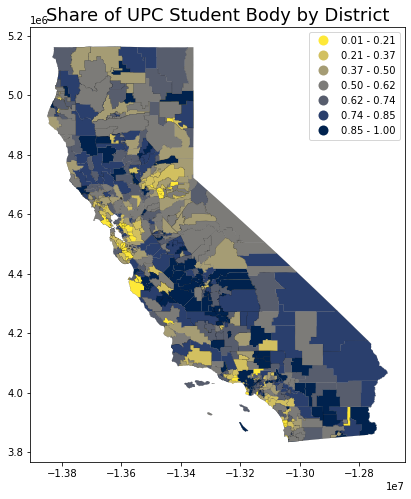

In [6]:
f, ax = plt.subplots(figsize  = (12, 8))

ax.set_title("Share of UPC Student Body by District", fontsize=18)

gdf.plot(
    column='unduplicat',
    legend=True,
    figsize=(15, 15),
    scheme="fisher_jenks",
    k=7,
    linewidth=.1,
    edgecolor='black',
    cmap='cividis_r',
    ax=ax
        )

The classification scheme impacts the visualization. Rather than using a standardized scheme, it might make more sense to use a user-defined classification to better distinguish districts that recieve concentration grants from districts that do not. That determining factor is the `unduplicated pupil count` or *UPC* of students which are disadvantaged in at least one of a few defined ways. A share of UPC of 0.55 or higher means that the district recieves a concentration grant. 

A user-defined classification to capture the cutoff for reciept of a concentration grant might look like this:
- 0 -> 0.25
- 0.25 -> 0.5499
- 0.55 -> 0.70
- 0.70 -> 1.0

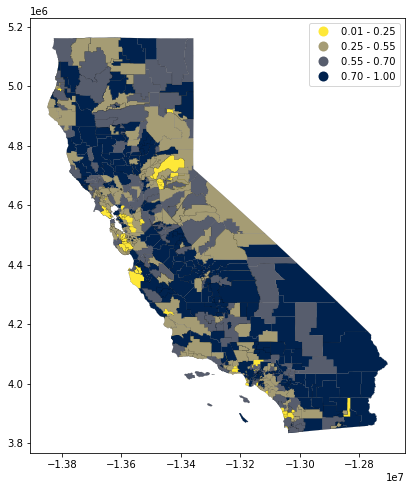

In [7]:
f, ax = plt.subplots(figsize=(12, 8))

gdf.plot(
    column='unduplicat',
    legend=True,
    figsize=(15, 15),
    scheme='userdefined',
    classification_kwds={'bins':[0.25, 0.5499, 0.7, 1]},
    linewidth=.1,
    edgecolor='black',
    cmap='cividis_r',
    ax=ax
        )

#histogram, distribution of values

the darker polygons indicate a higher share of UPC, while the lighter districts have a lesser concentration of disadvantaged students. What happens if we further divide the top bin, the districts with the smallest share of UPC?

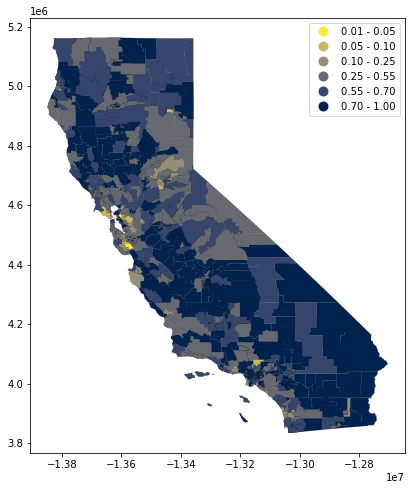

In [8]:
f, ax = plt.subplots(figsize=(12, 8))

gdf.plot(
    column='unduplicat',
    legend=True,
    figsize=(15, 15),
    scheme='userdefined',
    classification_kwds={'bins':[0.05, 0.1, 0.25, 0.5499, 0.7, 1]},
    linewidth=.1,
    edgecolor='black',
    cmap='cividis_r',
    ax=ax
        )

This reveals that there are fewer highly priviledged/homogenized districts than the previous visualization led us to believe, but there are still some. It looks like the marjority of priviledged districts are somwhere between the `0.1` and `0.25` range of UPC.

Now lets put the original Fisher Jenks classification next to our user-defined 4-bin classification scheme.

AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

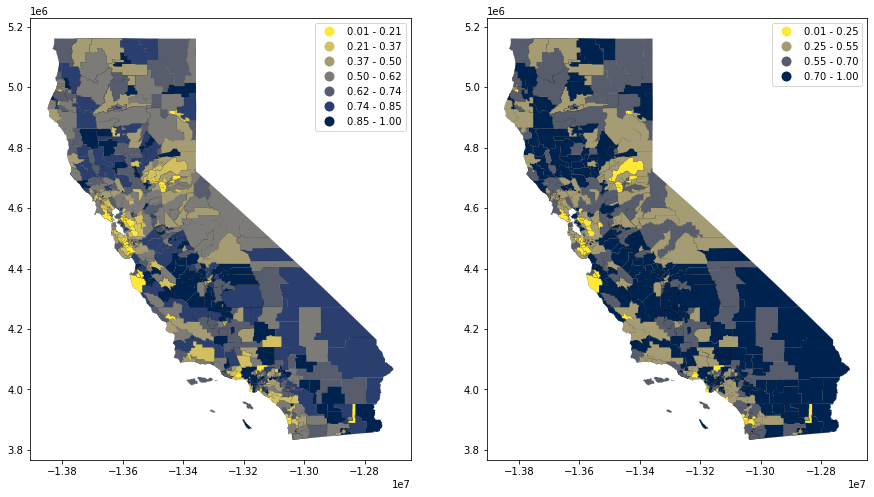

In [9]:
f, ax = plt.subplots(ncols=2, figsize=(15, 15))
#two plots breaks title

gdf.plot(
    column='unduplicat',
    legend=True,
    figsize=(15, 15),
    scheme="fisher_jenks",
    k=7,
    linewidth=.1,
    edgecolor='black',
    cmap='cividis_r',
    ax=ax[0]
        )

gdf.plot(
    column='unduplicat',
    legend=True,
    figsize=(15, 15),
    scheme='userdefined',
    classification_kwds={'bins':[0.25, 0.5499, 0.7, 1]},
    linewidth=.1,
    edgecolor='black',
    cmap='cividis_r',
    ax=ax[1]
        )
ax.set_title("Share of UPC Concentration, Fisher Jenks vs User Defined Classes")
# two plots side by side PogU